In [34]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [35]:
message_data = pd.read_csv("C:/Users/mayank.ranjan/Downloads/Machine-Learning-using-Python-master/Machine-Learning-using-Python-master/Datasets/spam_csv.csv")

In [36]:
message_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
message_data = message_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [38]:
message_data = message_data.rename(columns = {'v1':'Spam/Not_Spam','v2':'message'})

In [39]:
message_data.head()

,Spam/Not_Spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
message_data.groupby('Spam/Not_Spam').describe()

message         \
                count unique   
Spam/Not_Spam                  
ham              4825   4516   
spam              747    653   

                                                                       
                                                             top freq  
Spam/Not_Spam                                                          
ham                                       Sorry, I'll call later   30  
spam           Please call our customer service representativ...    4

In [41]:
docs = message_data['message'].str.lower()
docs.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: message, dtype: object

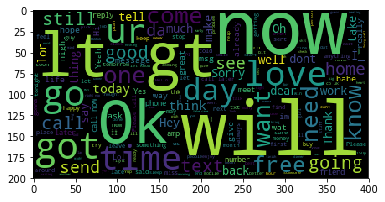

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud().generate(' '.join(message_data['message']))
plt.imshow(wc)

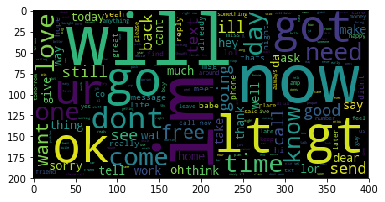

In [43]:
docs = docs.str.replace('[^a-z #@]', '')
wc = WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [44]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayank.ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
len(stop_words)

179

In [47]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [48]:
message_data_copy = message_data['message'].copy()

In [49]:
message_data_copy = message_data_copy.apply(text_preprocess)

In [51]:
message_data_copy

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
5       FreeMsg Hey darling 3 weeks word back Id like ...
6          Even brother like speak treat like aids patent
7       per request Melle Melle Oru Minnaminunginte Nu...
8       WINNER valued network customer selected receiv...
9       mobile 11 months U R entitled Update latest co...
10      Im gonna home soon dont want talk stuff anymor...
11      SIX chances win CASH 100 20000 pounds txt CSH1...
12      URGENT 1 week FREE membership å£100000 Prize J...
13      Ive searching right words thank breather promi...
14                                            DATE SUNDAY
15      XXXMobileMovieClub use credit click WAP link n...
16                                        Oh kim watching
17      Eh u r

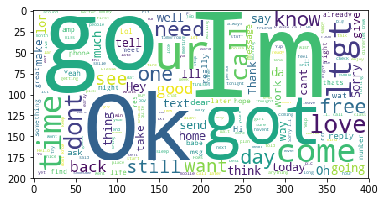

In [50]:
wc = WordCloud(background_color="white").generate(' '.join(message_data_copy))
plt.imshow(wc)

In [52]:
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(message_data_copy).toarray(), columns=vect.get_feature_names())

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìï,ìïll,ûthanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
message_mat = vect.fit_transform(message_data_copy)

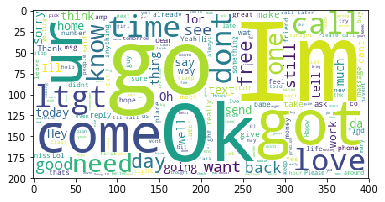

In [55]:
wc = WordCloud(background_color="white").generate(' '.join(message_data_copy))
plt.imshow(wc)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [57]:
Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9383971291866029

In [58]:
nltk.download('wordnet')




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayank.ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
#Let's try to improve accuracy by stemming
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words


In [66]:
message_data_copy = message_data_copy.apply(stemmer)
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message_data_copy)

In [67]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [68]:
Spam_model_1 = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model_1.fit(message_train, spam_nospam_train)
pred = Spam_model_1.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9461722488038278